In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as m

In [2]:
# maior valor seta para 1, demais seta 0
def binarizar(array):
    binarizado = np.zeros_like(array)  
    binarizado[np.argmax(array)] = 1
    return binarizado

In [3]:
## parametros
model_name='VGG13'
base_folder = 'data'

#modos
# training_mode, best_epoch = ("majority",80)
# training_mode, best_epoch = ("probability",78)
training_mode, best_epoch = ("crossentropy",98)
# training_mode, best_epoch = ("multi_target",89)
# tmbe = [("majority",80), ("probability",78), ("crossentropy",98), ("multi_target",89)]

In [4]:
emotion_table = {'neutral'  : 0, 
                 'happiness': 1, 
                 'surprise' : 2, 
                 'sadness'  : 3, 
                 'anger'    : 4, 
                 'disgust'  : 5, 
                 'fear'     : 6, 
                 'contempt' : 7}

emotion_labels = list(map(str.capitalize,sorted(emotion_table, key=emotion_table.get)))
emotion_values = sorted(emotion_table.values())


num_classes = len(emotion_table)

In [5]:
## folders tests
output_test_path   = os.path.join(base_folder, R'tests')
output_test_folder = os.path.join(output_test_path, model_name + '_' + training_mode)

if not os.path.exists(output_test_folder):
    os.makedirs(output_test_folder)

In [6]:
print(os.path.join(output_test_folder, "test_{}.npz".format(best_epoch)))
data = np.load(os.path.join(output_test_folder, "test_{}.npz".format(best_epoch)))

y_true = data['y_true']
y_pred = data['y_pred']

y_true_bin = np.array([ binarizar(arr) for arr in y_true ])
y_pred_bin = np.array([ binarizar(arr) for arr in y_pred ])

data/tests/VGG13_crossentropy/test_98.npz


In [7]:
m.accuracy_score(y_true.argmax(axis=1), y_pred.argmax(axis=1))

0.8721708638826905

In [8]:
m.cohen_kappa_score(y_true.argmax(axis=1), y_pred.argmax(axis=1), labels=emotion_values)

0.8307975457151973

In [9]:
print(m.classification_report(y_true_bin, y_pred_bin, target_names=emotion_labels, digits=3))

              precision    recall  f1-score   support

     Neutral      0.865     0.904     0.884      1083
   Happiness      0.948     0.960     0.954       892
    Surprise      0.870     0.904     0.887       394
     Sadness      0.769     0.715     0.741       382
       Anger      0.835     0.844     0.839       269
     Disgust      0.400     0.250     0.308        16
        Fear      0.727     0.465     0.567        86
    Contempt      1.000     0.067     0.125        15

   micro avg      0.872     0.872     0.872      3137
   macro avg      0.802     0.638     0.663      3137
weighted avg      0.869     0.872     0.868      3137
 samples avg      0.872     0.872     0.872      3137



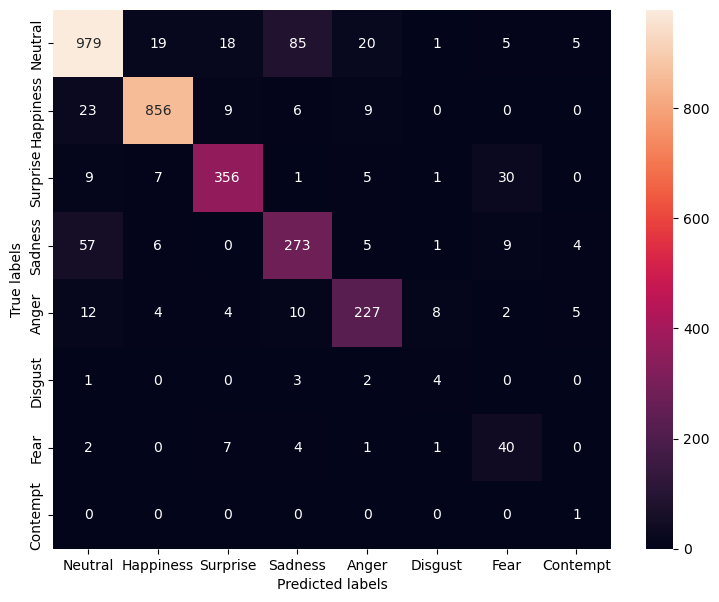

In [10]:
# ax= plt.subplot()

fig, ax = plt.subplots(figsize=(9, 7))

cm = m.confusion_matrix(y_pred.argmax(axis=1),y_true.argmax(axis=1))

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
# ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(emotion_labels)
ax.yaxis.set_ticklabels(emotion_labels)

plt.show()

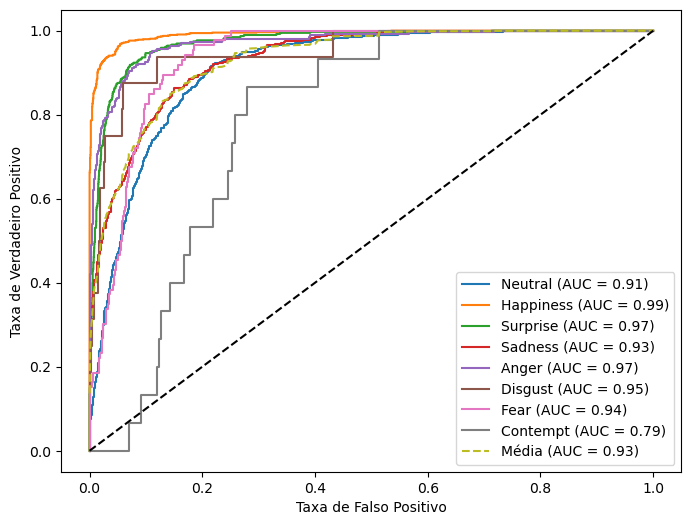

In [11]:
# Calcule a curva ROC e o AUC para cada classe
fpr = {}
tpr = {}
roc_auc = {}

for i in range(8):
    fpr[i], tpr[i], _ = m.roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = m.auc(fpr[i], tpr[i])

# Calcule a média das métricas em todas as classes
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(8)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(8):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= 8
mean_auc = m.auc(all_fpr, mean_tpr)

# Plote as curvas ROC para cada classe
plt.figure(figsize=(8, 6))

for i,label in enumerate(emotion_labels):
    plt.plot(fpr[i], tpr[i], label=f'{label.capitalize()} (AUC = {roc_auc[i]:.2f})')

# Plote a média das curvas ROC
plt.plot(all_fpr, mean_tpr, label=f'Média (AUC = {mean_auc:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
# plt.title('Curvas ROC')
plt.legend()
plt.show()

In [12]:
m.coverage_error(y_true, y_pred)

1.185208798214855